# Ridge Regression Implementation

Gradient descent with UCI wine data

In [78]:
from ucimlrepo import fetch_ucirepo

wine_quality = fetch_ucirepo(id=186)
wine_quality.data.features.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [79]:
import numpy as np

# Ridge regression gradient descent
# X.dot(theta) are the predictions
def compute_cost(X, y, theta, lam):
    errors = X.dot(theta) - y
    mse = (1 / len(y)) * np.sum(errors ** 2)
    cost = lam * np.sum(theta[1:] ** 2)
    return mse + cost

def gradient_descent(X, y, theta, learning_rate=0.01, lam=0.01, num_iterations=1000):
    n = len(y)
    cost_history = []

    for _ in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y

        gradient = (2 / n) * X.T.dot(errors)

        # regularization
        reg = 2 * lam * theta
        # don't regularize bias
        reg[0] = 0
        gradient += reg

        theta = theta - learning_rate * gradient
        cost_history.append(compute_cost(X, y, theta, lam))

    return theta, cost_history

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(wine_quality.data.features, wine_quality.data.targets, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
# to 1d array
y_train = np.ravel(y_train.values)
y_test = np.ravel(y_test.values)

theta = np.zeros(X_train_scaled.shape[1])
final_theta, final_cost_history = gradient_descent(X_train_scaled, y_train, theta)

print("Coefficients:", final_theta)
print("Cost (MSE):", final_cost_history[-1])
print("RMSE:", np.sqrt(final_cost_history[-1]))

Coefficients: [ 0.07072239 -0.2223372  -0.01839533  0.17487477 -0.0176549   0.11873203
 -0.13885834 -0.11304424  0.0577845   0.11226865  0.34720355]
Cost (MSE): 34.349897567857845
RMSE: 5.860878566209834


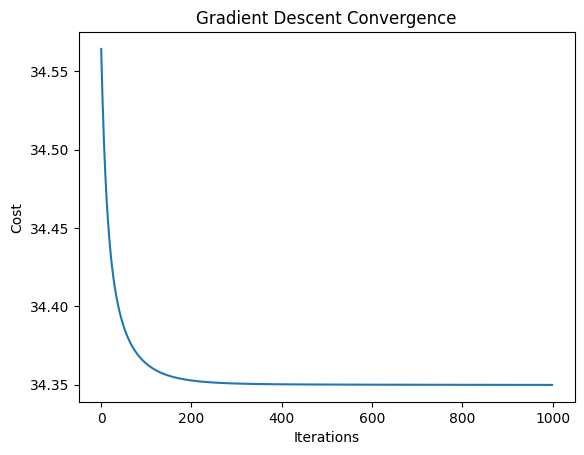

In [82]:
import matplotlib.pyplot as plt
# if plot dives sharply then flattens, this is good
plt.plot(final_cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Convergence")
plt.show()